# Part 2: 
For the next step you need a citation graph of the given papers. The task is to find the citation graph, and possibly have
a mechanism to find what papers would some new literature cite. The output should be an adjacency matrix. [Note: You
can also use this concept to improve your literature shelves].

In [ ]:
%cd drive/MyDrive/Project

/content/drive/MyDrive/Project


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the required libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sys


In [ ]:
dataset = pd.read_json("assignment_dump.json", orient='columns')

In [ ]:
df = dataset[:1000]

In [ ]:
df.head(10)

,abstract,authors,n_citation,references,title,venue,year,id
0,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
1,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
2,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",50,[],Multisymplectic Spectral Methods for the Gross...,international conference on conceptual structures,2002,00bcf2d5-1592-46b0-81fd-933f90b5ecca
3,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",50,"[6e8a3ec3-9a99-4fac-ac4d-f8d1bf0fa208, 7bb71af...",Relational Abstract Interpretation of Higher O...,,1991,00c85316-bddf-4bcb-93f5-097adadd73c2
4,This paper focuses on knowledge engineering fo...,"[Efthymios Alepis, Maria Virvou, Katerina Kaba...",50,"[522bea13-bd45-4918-9478-e87ae2f039f7, 60507d4...",Knowledge Engineering for Affective Bi-Modal I...,joint conference on knowledge-based software e...,2008,00dd5ece-1339-4cb6-a08e-43742ae2dac6
5,NaN,"[Abdullah Alsubaie, Antonio Di Pietro, Jose R....",6,"[0293844d-7244-4562-a6ca-d84bcd9c10a5, 14cd3cf...",A Platform for Disaster Response Planning with...,,2013,00e3940b-201b-40ba-bd20-dbdaf26ad324
6,Xax is a browser plugin model that enables dev...,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",50,"[0abc9de7-e047-44fc-998d-4bf02b9bc9ab, 2c9ebc3...",Leveraging legacy code to deploy desktop appli...,operating systems design and implementation,2008,010d4ce9-0279-4166-ae73-14551ded6404
7,"In recent years, most of mobile phones have a ...","[Hiroshi Furukawa, Yutaka Nakamura]",7,"[b2f0e0d3-0071-4076-921e-f93f30160c1c, f030524...",A pedestrian navigation method for user's safe...,international conference on human computer int...,2013,010d9907-45ef-459a-a293-8e1f41cef2b7
8,Previous language modeling approaches to infor...,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",50,"[00515e82-3da6-497a-83d3-459e93247123, 0cd820e...",Word pairs in language modeling for informatio...,,2004,012b88ae-a763-45d6-8f19-2ec9ff739d5f
9,NaN,"[Prudence W. H. Wong, Fencol C. C. Yung, Mihai...",6,"[08784bb3-09b9-4bd2-a191-2606f3b3a8b8, 16bf10e...",An 8/3 Lower Bound for Online Dynamic Bin Packing,international symposium on algorithms and comp...,2012,01546472-0ac9-47fa-acca-ffcb7fc99097


In [ ]:
print(len(df))

1000


In [ ]:
for row in df:
  print(row)

abstract
authors
n_citation
references
title
venue
year
id


# Creating and modifying the dictionary

In [ ]:
id_dict = pd.Series(df.references.values,index=df.id).to_dict()

In [ ]:
for key in id_dict:
  print(id_dict[key])

['10482dd3-4642-4193-842f-85f3b70fcf65', '3133714c-f979-4d84-9224-97361cf053ab', '3a926fef-7422-4654-8776-8e31b45be563', '52f480e8-85e6-4c01-9e5b-d75eabf6a8ec', '6f52f995-7c4c-4a92-83aa-d1c9fbd2465c', '8bd964d6-c45f-448c-9e65-efe5f98ca0a0', '8fa0a362-6522-48fc-bd5e-24de00ed6511', '9bfa8c24-8fb6-44d9-ba42-38b22f9cf34b', 'b57cc9ef-64b6-479d-9918-5f283af3219d', 'b678b546-e867-4a57-8963-c5545b04f32d', 'e5c40bf5-7ee2-4cff-a75a-b708ab69997b', 'f0dccb0c-c17a-4fcb-a89f-fe4bdfa3356d', 'fdd93623-31c8-487b-8554-d6c6b25af5f6']
['2d84c0f2-e656-4ce7-b018-90eda1c132fe', 'a083a1b9-8dfb-45d6-99a9-fa30c4a6e9f5']
[]
['6e8a3ec3-9a99-4fac-ac4d-f8d1bf0fa208', '7bb71afa-91b8-46e7-9008-da84e0427b93', '838d99b5-5b05-41a8-adc7-a597195fefad', '9a4984f9-27d4-47eb-8bc8-0469bf540f94', 'afa6d820-c762-4285-a25d-9dd985929ec3']
['522bea13-bd45-4918-9478-e87ae2f039f7', '60507d41-633f-4a9d-8265-b66b895a6af2', '6ab0f76f-a0b4-4747-aba0-4dbb43683dd3', 'ce3efb6d-06c0-44ba-9b5b-1c03c5ee39d5', 'e00936e8-c5b3-4833-871a-938a7b11

In [ ]:
for key in id_dict:
  for value in id_dict[key]:
    if value not in id_dict:
      id_dict[key].remove(value)

In [ ]:
for key in id_dict:
  print(id_dict[key])

['3133714c-f979-4d84-9224-97361cf053ab', '52f480e8-85e6-4c01-9e5b-d75eabf6a8ec', '8bd964d6-c45f-448c-9e65-efe5f98ca0a0', '9bfa8c24-8fb6-44d9-ba42-38b22f9cf34b', 'b678b546-e867-4a57-8963-c5545b04f32d', 'f0dccb0c-c17a-4fcb-a89f-fe4bdfa3356d']
['a083a1b9-8dfb-45d6-99a9-fa30c4a6e9f5']
[]
['7bb71afa-91b8-46e7-9008-da84e0427b93', '9a4984f9-27d4-47eb-8bc8-0469bf540f94']
['60507d41-633f-4a9d-8265-b66b895a6af2', 'ce3efb6d-06c0-44ba-9b5b-1c03c5ee39d5']
['14cd3cf4-7086-4387-8b96-8f64359ac38e', '9af84bb2-1378-4ad1-bb14-0377896b057d', 'ca159adb-f25e-4246-9624-42b422ffc5a9']
['2c9ebc3d-713f-42d8-a867-0ff2d24644d3', '4176c232-fa9d-4540-a778-d2fe285cd2ae', '440c32ee-b296-47b4-bd9e-c57e9743fd47', '485eeb4b-a2f8-4796-9b1e-ed3c793bc6b1', '5aa9499d-836a-4b54-9db7-f67a6d849dfa', '7596d96c-6c5a-4fef-9471-a461ef44e747', 'a4d42fcb-07bd-4069-bf66-4c1a07110534', 'b1344aa2-8641-43ea-8f44-3e41148a4134', 'b826aeb6-49f6-42a8-878b-4b45d69c9fbb', 'c2c345e8-59c0-4140-9e27-8fcd2518f1f2', 'df8373df-b271-4477-9c98-612aa5

# Creating the adjacency matrix and citation graph

In [ ]:
edges = [(a, b) for a, bs in id_dict.items() for b in bs]

df1 = pd.DataFrame(edges)

adj_matrix = pd.crosstab(df1[1], df1[1])

In [ ]:
pd.set_option('max_rows',100)
pd.set_option('max_colwidth',100)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 100]


In [ ]:
print(len(edges))

4284


In [ ]:
print(edges)

[('001c58d3-26ad-46b3-ab3a-c1e557d16821', '3133714c-f979-4d84-9224-97361cf053ab'), ('001c58d3-26ad-46b3-ab3a-c1e557d16821', '52f480e8-85e6-4c01-9e5b-d75eabf6a8ec'), ('001c58d3-26ad-46b3-ab3a-c1e557d16821', '8bd964d6-c45f-448c-9e65-efe5f98ca0a0'), ('001c58d3-26ad-46b3-ab3a-c1e557d16821', '9bfa8c24-8fb6-44d9-ba42-38b22f9cf34b'), ('001c58d3-26ad-46b3-ab3a-c1e557d16821', 'b678b546-e867-4a57-8963-c5545b04f32d'), ('001c58d3-26ad-46b3-ab3a-c1e557d16821', 'f0dccb0c-c17a-4fcb-a89f-fe4bdfa3356d'), ('001c8744-73c4-4b04-9364-22d31a10dbf1', 'a083a1b9-8dfb-45d6-99a9-fa30c4a6e9f5'), ('00c85316-bddf-4bcb-93f5-097adadd73c2', '7bb71afa-91b8-46e7-9008-da84e0427b93'), ('00c85316-bddf-4bcb-93f5-097adadd73c2', '9a4984f9-27d4-47eb-8bc8-0469bf540f94'), ('00dd5ece-1339-4cb6-a08e-43742ae2dac6', '60507d41-633f-4a9d-8265-b66b895a6af2'), ('00dd5ece-1339-4cb6-a08e-43742ae2dac6', 'ce3efb6d-06c0-44ba-9b5b-1c03c5ee39d5'), ('00e3940b-201b-40ba-bd20-dbdaf26ad324', '14cd3cf4-7086-4387-8b96-8f64359ac38e'), ('00e3940b-201b

In [ ]:
print(adj_matrix)

1                                     01253a71-0b02-48d3-ad57-70c45f10cc81  ...  fff742e8-a969-4e3e-87a5-1b7c3bb37aa7
1                                                                           ...                                      
01253a71-0b02-48d3-ad57-70c45f10cc81                                     1  ...                                     0
01d0b8a2-cd17-4455-a3fb-46ac6d221686                                     0  ...                                     0
02ed122f-8651-4ac7-8d48-2700c3f66168                                     0  ...                                     0
02f9e6a6-2ab5-4c4b-9398-1f14ea057fe5                                     0  ...                                     0
02ff8bb0-383f-46f9-87b1-2ab5221447b8                                     0  ...                                     0
...                                                                    ...  ...                                   ...
ffc44518-aeec-49bd-88cc-dbd72d3f94f4                    

List of all nodes:  ['001c58d3-26ad-46b3-ab3a-c1e557d16821', '3133714c-f979-4d84-9224-97361cf053ab', '52f480e8-85e6-4c01-9e5b-d75eabf6a8ec', '8bd964d6-c45f-448c-9e65-efe5f98ca0a0', '9bfa8c24-8fb6-44d9-ba42-38b22f9cf34b', 'b678b546-e867-4a57-8963-c5545b04f32d', 'f0dccb0c-c17a-4fcb-a89f-fe4bdfa3356d', '001c8744-73c4-4b04-9364-22d31a10dbf1', 'a083a1b9-8dfb-45d6-99a9-fa30c4a6e9f5', '00c85316-bddf-4bcb-93f5-097adadd73c2', '7bb71afa-91b8-46e7-9008-da84e0427b93', '9a4984f9-27d4-47eb-8bc8-0469bf540f94', '00dd5ece-1339-4cb6-a08e-43742ae2dac6', '60507d41-633f-4a9d-8265-b66b895a6af2', 'ce3efb6d-06c0-44ba-9b5b-1c03c5ee39d5', '00e3940b-201b-40ba-bd20-dbdaf26ad324', '14cd3cf4-7086-4387-8b96-8f64359ac38e', '9af84bb2-1378-4ad1-bb14-0377896b057d', 'ca159adb-f25e-4246-9624-42b422ffc5a9', '010d4ce9-0279-4166-ae73-14551ded6404', '2c9ebc3d-713f-42d8-a867-0ff2d24644d3', '4176c232-fa9d-4540-a778-d2fe285cd2ae', '440c32ee-b296-47b4-bd9e-c57e9743fd47', '485eeb4b-a2f8-4796-9b1e-ed3c793bc6b1', '5aa9499d-836a-4b54

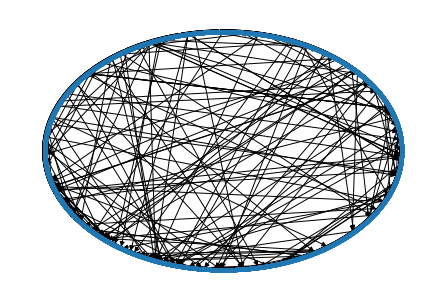

<Figure size 2880x2880 with 0 Axes>

In [ ]:
g = nx.DiGraph(edges)
nx.draw_shell(g,with_labels=False,node_size=10)
print("List of all nodes: ", list(g.nodes()))
print("List of all edges: ", list(g.edges()))
print("In-degree for all nodes: ", dict(g.in_degree()))
print("Out degree for all nodes: ", dict(g.out_degree))
  

plt.figure(figsize =(40, 40))
plt.draw()
plt.show()

# Predicting reference papers for new literature

In [ ]:
!pip install pyLDAvis
import nltk
nltk.download('stopwords')

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 45.5 MB/s 
     |████████████████████████████████| 15.7 MB 50.5 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=31f4efd30cdae339ec50dd704ce8bb062511979061bc1abbc7309efd398f9b21
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel
from gensim.models import CoherenceModel
from gensim.parsing.porter import PorterStemmer
import pyLDAvis
import pyLDAvis.gensim_models
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import string
from pprint import pprint
import warnings
import spacy
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa


In [ ]:
dataset = pd.read_json("assignment_dump.json", orient='columns')

#Cleaning and lemmatizing dataset

In [ ]:
df = dataset[:90000]

In [ ]:
dataset = df
dataset["abstract"]=dataset["abstract"].fillna("")
dataset["title"]=dataset["title"].fillna("")
dataset["venue"]=dataset["venue"].fillna("")
dst1=dataset["abstract"].tolist()
dst2=dataset["title"].tolist()
dst3=dataset["venue"].tolist()
dst1=["{} ".format(ele) for ele in np.squeeze(dst1)]
dst2=["{} ".format(ele) for ele in np.squeeze(dst2)]
dst3=["{} ".format(ele) for ele in np.squeeze(dst3)]
dst=np.char.add(dst1, dst2)
dst=np.char.add(dst, dst3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
dtst=[[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in dst]

In [ ]:
print(dtst[0:5])

[['paper', 'describes', 'design', 'implementation', 'methodology', 'visualisation', 'hypothetical', 'virtual', 'reconstruction', 'roman', 'polychrome', 'statuary', 'research', 'purposes', 'methodology', 'intended', 'attempt', 'move', 'beyond', 'visualisations', 'simply', 'believable', 'towards', 'physically', 'accurate', 'approach', 'accurate', 'representations', 'polychrome', 'statuary', 'great', 'potential', 'utility', 'means', 'illustrating', 'existing', 'interpretations', 'means', 'testing', 'revising', 'developing', 'hypotheses', 'goal', 'methodology', 'propose', 'pipeline', 'incorporates', 'high', 'degree', 'physical', 'accuracy', 'whilst', 'also', 'practically', 'applicable', 'conventional', 'archaeological', 'research', 'setting', 'methodology', 'designed', 'allow', 'accurate', 'visualisation', 'surviving', 'objects', 'colourants', 'well', 'providing', 'reliable', 'methods', 'hypothetical', 'reconstruction', 'elements', 'longer', 'survive', 'process', 'proposed', 'intended', 'l

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
dtst=lemmatization(dtst)

#Similarity measure 

In [ ]:
def calculate_jaccard(word_tokens1, word_tokens2):
# Combine both tokens to find union.
  both_tokens = word_tokens1 + word_tokens2
  union = set(both_tokens)

  # Calculate intersection.
  intersection = set()
  for w in word_tokens1:
    if w in word_tokens2:
      intersection.add(w)

  jaccard_score = len(intersection)/len(union)
  return jaccard_score

  for _ in range(len(df)):
    jaccard_score()

In [ ]:
score=[]

top_scores=[]

index=[]
ind = 0

for _ in range(len(dtst)):
  score.append(calculate_jaccard(dtst[80600], dtst[_]))

for i in range(5):
  max = score[0]
  for j in range(len(score)):
    if max < score[j] and score[j]!=1:
      max = score[j]
      ind = j

  
  top_scores.append(score[ind])

  index.append(ind)
  score[ind] = 0

print(index)

[82730, 20826, 45617, 76779, 23183]


In [ ]:
print(top_scores)

[0.2074074074074074, 0.1791044776119403, 0.1774193548387097, 0.17164179104477612, 0.1694915254237288]


In [ ]:
paper_id =[]

for x in index:
 paper_id.append( dataset['id'].get(x) )

In [ ]:
id_dict1 = pd.Series(df.references.values,index=df.id).to_dict()

In [ ]:
for key in id_dict1:
  for value in id_dict1[key]:
    if value not in id_dict1:
      id_dict1[key].remove(value)

In [ ]:
for key in paper_id:
  if(id_dict1[key]):
    print(id_dict1[key])

['309ec4e0-df41-4901-a61b-b445ce82c695', '426790b0-8655-4c37-89d0-13ce1377c26c', '6cf84173-a765-4328-9d4c-9830752f35a2', '74198f2a-6531-44dc-8218-a63f1de1a024', '99dfb508-10c1-4e15-bb7c-daa4b7fe1e07', 'c5c61e0e-db2f-4223-b0c3-4fe833773e04', 'e03cde3a-6bb6-4578-a266-fe4731bc6f6e']
['3a95bc5d-058a-4f2d-a003-c2dcf47acef7', '4c0b6d99-d216-4031-8a6b-bbad950648b0', '7964a019-c3ce-4055-b974-41266d1f78ed', 'a1e762ba-4019-4722-b9e1-b7ed9a7644a9', 'bfa96451-4cc8-48da-b53a-17616df9ce25', 'c6e05afd-f239-4c1b-a760-13b7f7f2ed43', 'd5ee57ff-ae9b-4d58-9507-150dcd605da3']
['3e33fbf3-27a8-4468-99de-e1c678b90ef3', 'bebff7e0-0cac-4604-86ee-d05fdf763029']
['33abc1fc-50ea-4837-a4a0-65c1d4c0e0b7', '53cf6636-4d95-4a2c-8636-63c755247a65', '62bb9966-831d-4844-8494-6fdc8965f974', '7964a019-c3ce-4055-b974-41266d1f78ed', 'aa1ce182-cd33-40c6-b51d-ae88b16b5ef3', 'c4d30d07-f685-4b03-b864-29866f1b6643', 'df1ecfa5-764f-4171-ba29-8738a208540a']
['12fa9885-b0a9-4ea3-a0de-e020c333c3f0', '31694e30-f279-4014-8a46-cf76272cd0